In [1]:
%cd ..

C:\Users\Test\Geoalert\aeronetlib\aeronet_raster


## Test

Writing at (-4, -4)


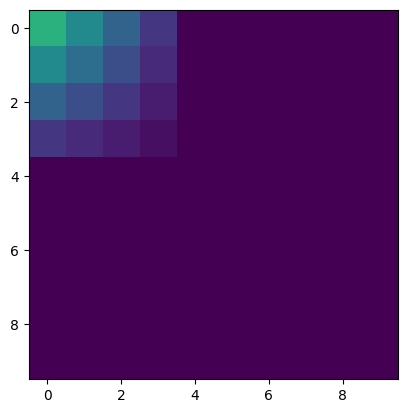

Writing at (0, -4)


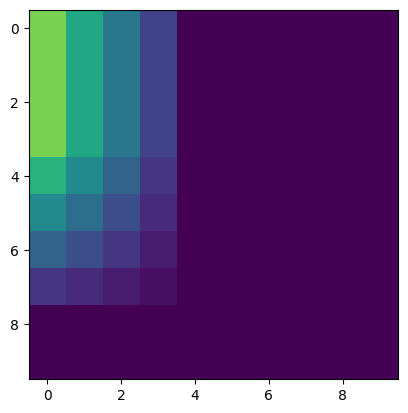

Writing at (4, -4)


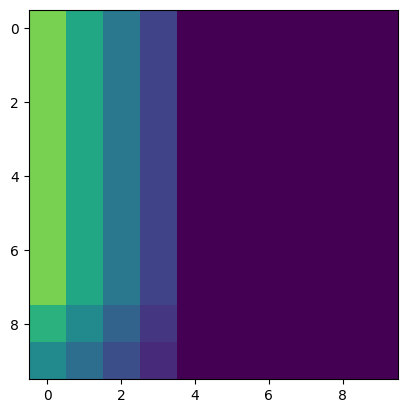

Writing at (8, -4)


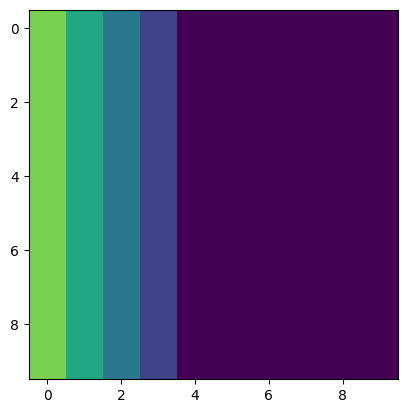

Writing at (-4, 0)


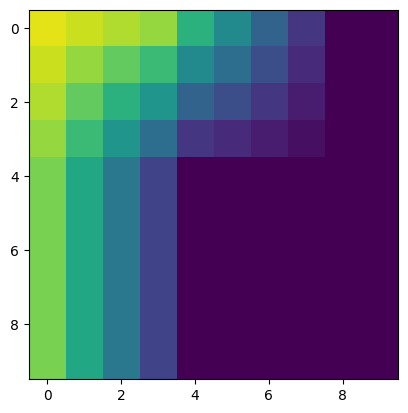

Writing at (0, 0)


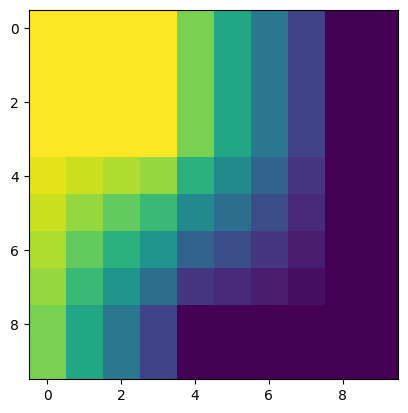

Writing at (4, 0)


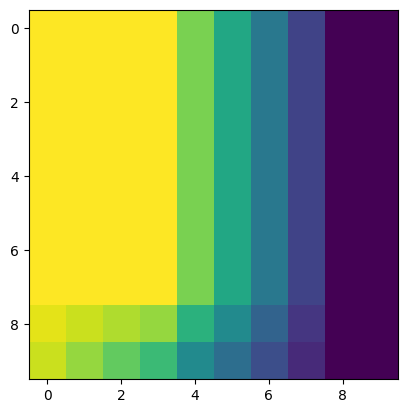

Writing at (8, 0)


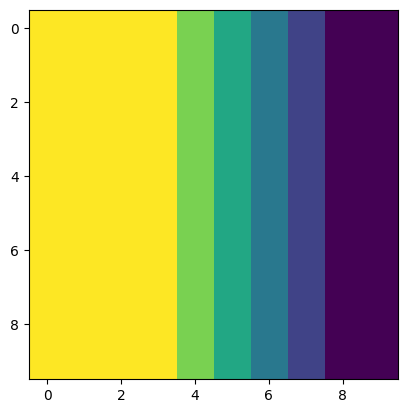

Writing at (-4, 4)


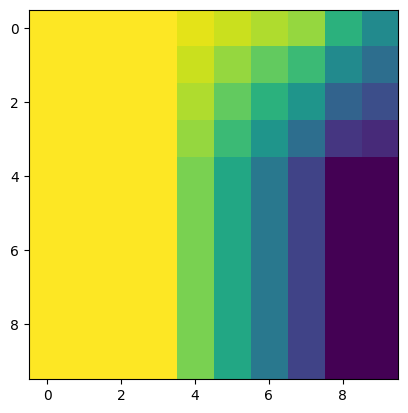

Writing at (0, 4)


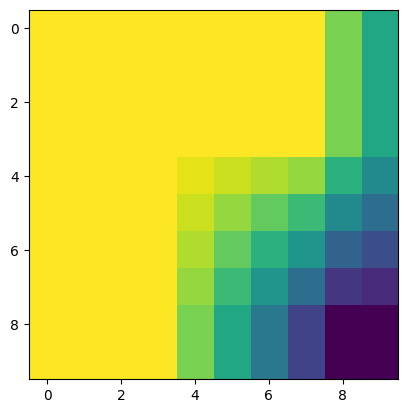

Writing at (4, 4)


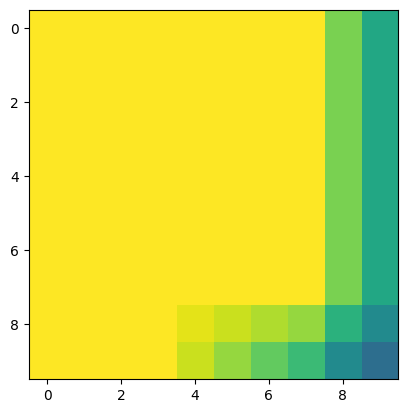

Writing at (8, 4)


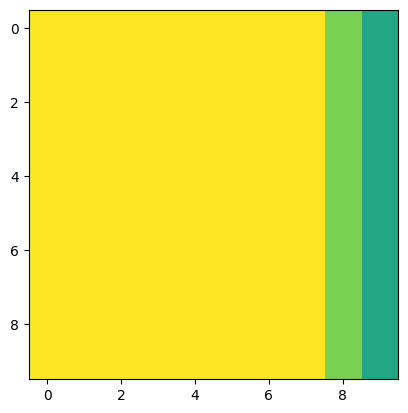

Writing at (-4, 8)


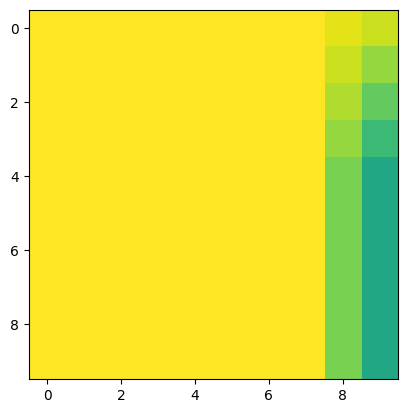

Writing at (0, 8)


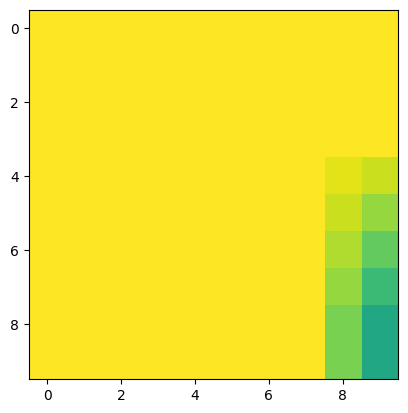

Writing at (4, 8)


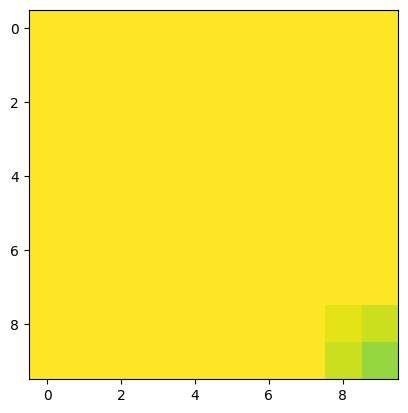

Writing at (8, 8)


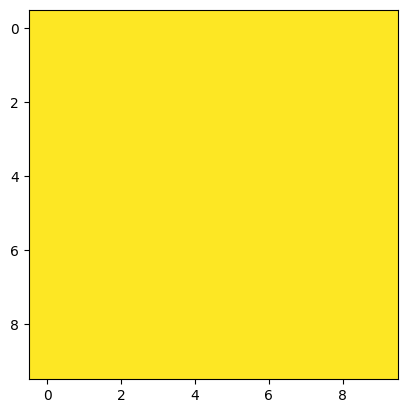

In [13]:
mask = dataprocessor.get_blend_mask((8, 8), (2, 2))
data = numpyadapter.NumpyWriter(np.zeros((10, 10)))  # NumpyWriter нужен чтобы корректно писать по координатам в out of bounds, например, (-2, -2)
stride = 8-4 # шаг окна 
for x in range(-4, 10, stride):
    for y in range(-4, 10, stride):
        data[y:y+8, x:x+8] += mask
        print(f'Writing at ({y}, {x})')
        plt.imshow(data._data, vmin=0, vmax=1)
        plt.show()


In [14]:
data._data

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

## Test on real image

In [7]:
from aeronet_raster.dataadapters import rasterioadapter
from aeronet_raster import dataprocessor
from aeronet_raster.utils.samplers.gridsampler import get_safe_shape, make_grid
from matplotlib import pyplot as plt
import numpy as np
import importlib
import logging
importlib.reload(rasterioadapter)
importlib.reload(dataprocessor)

<module 'aeronet_raster.dataprocessor' from 'C:\\Users\\Test\\Geoalert\\aeronetlib\\aeronet_raster\\aeronet_raster\\dataprocessor.py'>

In [4]:
# 'crop' mode
logging.basicConfig(level=logging.INFO)
with rasterioadapter.RasterioReader('test/unit/test_data/input.tif') as src:
    profile = src.profile
    with rasterioadapter.RasterioWriter('test/unit/test_data/output.tif', profile) as dst:
        dataprocessor.process_image(src=src,
                                    src_sample_size=512,
                                    src_margin=64,
                                    processor=lambda x: x,
                                    dst=dst,
                                    mode='crop',
                                    verbose=False)  # set verbose to True to see how the sampling goes
        

In [9]:
# 'crossfade' mode

logging.basicConfig(level=logging.INFO)
with rasterioadapter.RasterioReader('test/unit/test_data/input.tif') as src:
    profile = src.profile
    profile['dtype'] = 'float32'
    with rasterioadapter.RasterioWriter('test/unit/test_data/output.tif', profile) as dst:
        dataprocessor.process_image(src=src,
                                    src_sample_size=512,
                                    src_margin=64,
                                    processor=lambda x: x,
                                    dst=dst,
                                    mode='crossfade',
                                    verbose=False)

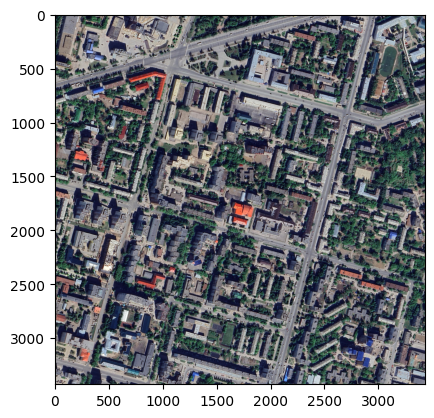

In [11]:
import rasterio
with rasterio.open('test/unit/test_data/input.tif') as src:
    rgb = src.read()

plt.imshow(rgb.transpose(1, 2, 0))

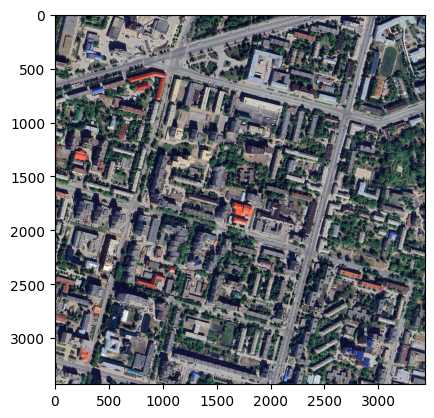

In [14]:
from aeronet_raster.dataadapters import numpyadapter
src = numpyadapter.NumpyReader(rgb)
dst = numpyadapter.NumpyWriter(np.zeros(rgb.shape))
dataprocessor.process_image(src=src,
                            src_sample_size=512,
                            src_margin=64,
                            processor=lambda x: x,
                            dst=dst,
                            mode='crossfade',
                            verbose=False)
plt.imshow(dst._data.astype(np.uint8).transpose(1, 2, 0))